In [1]:
from symreg import Regressor
import pandas as pd
import numpy as np
import random
import traceback
import time
import re

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from multiprocessing import Pool


In [2]:
diff_data, duration_per = 1200, 5 # 30 minutes -> 4.55 minutes (7 jobs))
n_jobs = 7
# diff_data, duration_per   = 30, 3 # instant

X, y = load_boston(return_X_y=True)
X /= X.mean()
y /= y.mean()
X, Xt, y, yt = train_test_split(X, y, test_size=0.4, random_state=0)

results = []

parallel_speedup = 1/(1+(n_jobs-1)*.88)

def time_left(diff_data):
    return f'{parallel_speedup * diff_data * duration_per / 60:.2} minutes'

print(f'Will take {time_left(diff_data)}')

def eval_settings(**settings):
    r = Regressor(duration=duration_per, **settings)
    r.fit(X, y)
    
    y_out = r.predict(Xt, max_complexity=10)
    error = np.median((yt - y_out) ** 2)
    return {**settings, **{'error': error}}

def process(i):
    random.seed(i)
    muts = {    
        'prune_mutation_chance':     random.random(),
        'hoist_mutation_chance':     random.random(),
        'grow_leaf_mutation_chance': random.random(),
        'grow_root_mutation_chance': random.random(),
    }
    point_mut_chance = random.random()
    
    fix_muts = {
    }
    
    totalmut = point_mut_chance + sum(v for v in muts.values())
    totalfixmut = sum(v for v in fix_muts.values())
    
    muts = {k: v*(1-totalfixmut)/totalmut for k, v in muts.items()}
        
    try:
        args = {
            **muts,
            **fix_muts,
            'simplify_chance': random.random(),
            'n': random.choice([20, 30, 50, 80, 130]),
            'mutation_children': random.choice([1, 2, 3, 5]),
            'crossover_children': random.choice([1, 2, 3, 5]),
        }

        my_result = eval_settings(**args)
        print(my_result)
        print('============', time_left(diff_data - i-1), 'left')
        return my_result
    except ValueError as e:
        print('============', 'Value Error for seed', i, ': ', args)
        traceback.print_exc()
    except AssertionError as e:
        print('============', 'AssertionError for seed', i, ': ', args)
        traceback.print_exc()

start = time.time()
with Pool(7) as p:
    results = [res for res in p.map(process, range(diff_data)) if res is not None]
print("actually taken (min):", (time.time()-start)/60)


Will take 1.6e+01 minutes
{'prune_mutation_chance': 0.17174239451048517, 'hoist_mutation_chance': 0.22915552071378778, 'grow_leaf_mutation_chance': 0.07964390760396578, 'grow_root_mutation_chance': 0.2591439825053618, 'simplify_chance': 0.955116312196863, 'n': 30, 'mutation_children': 3, 'crossover_children': 2, 'error': 0.01697007631668391}
============ 1.4e+01 minutes left
{'prune_mutation_chance': 0.11440754691303799, 'hoist_mutation_chance': 0.06944799700167203, 'grow_leaf_mutation_chance': 0.2753519449036508, 'grow_root_mutation_chance': 0.2403846211496438, 'simplify_chance': 0.461195257019947, 'n': 80, 'mutation_children': 2, 'crossover_children': 1, 'error': 0.02110896341744176}
============ 1.4e+01 minutes left{'prune_mutation_chance': 0.3023199914954388, 'hoist_mutation_chance': 0.27136290733950236, 'grow_leaf_mutation_chance': 0.15057307731955671, 'grow_root_mutation_chance': 0.09269739953463703, 'simplify_chance': 0.4049341374504143, 'n': 50, 'mutation_children': 5, 'crossov

{'prune_mutation_chance': 0.29956344278487507, 'hoist_mutation_chance': 0.1348958738112912, 'grow_leaf_mutation_chance': 0.19850886586932626, 'grow_root_mutation_chance': 0.28995824888321486, 'simplify_chance': 0.5157172840235198, 'n': 130, 'mutation_children': 1, 'crossover_children': 1, 'error': 0.02410572593843155}
============ 1.5e+01 minutes left
{'prune_mutation_chance': 0.15707426277222547, 'hoist_mutation_chance': 0.05689575083361708, 'grow_leaf_mutation_chance': 0.49579535698533816, 'grow_root_mutation_chance': 0.1825482896433174, 'simplify_chance': 0.9100936721305863, 'n': 20, 'mutation_children': 3, 'crossover_children': 5, 'error': 0.03213717541305201}
============ 1.3e+01 minutes left
{'prune_mutation_chance': 0.18708847978451998, 'hoist_mutation_chance': 0.02183600114234872, 'grow_leaf_mutation_chance': 0.24164230227780523, 'grow_root_mutation_chance': 0.3375199930810273, 'simplify_chance': 0.9905541185839895, 'n': 130, 'mutation_children': 1, 'crossover_children': 5, 'er

{'prune_mutation_chance': 0.23207613561768842, 'hoist_mutation_chance': 0.25114452693242073, 'grow_leaf_mutation_chance': 0.20377145060274898, 'grow_root_mutation_chance': 0.19325387524202725, 'simplify_chance': 0.8903235325531715, 'n': 20, 'mutation_children': 3, 'crossover_children': 1, 'error': 0.015287455972731564}
============ 1.2e+01 minutes left
{'prune_mutation_chance': 0.22598275184659553, 'hoist_mutation_chance': 0.2278454199368989, 'grow_leaf_mutation_chance': 0.2126952608183775, 'grow_root_mutation_chance': 0.15359482844386083, 'simplify_chance': 0.33623275100902916, 'n': 80, 'mutation_children': 3, 'crossover_children': 2, 'error': 0.016453833783282464}
============ 1.4e+01 minutes left
{'prune_mutation_chance': 0.1435184558947734, 'hoist_mutation_chance': 0.19255842964111444, 'grow_leaf_mutation_chance': 0.19024932870498687, 'grow_root_mutation_chance': 0.20071711691934843, 'simplify_chance': 0.966876781563112, 'n': 20, 'mutation_children': 5, 'crossover_children': 2, 'er

{'prune_mutation_chance': 0.20293393261375292, 'hoist_mutation_chance': 0.1371693077364065, 'grow_leaf_mutation_chance': 0.2661880050683805, 'grow_root_mutation_chance': 0.14395132312006576, 'simplify_chance': 0.12832266797844005, 'n': 80, 'mutation_children': 1, 'crossover_children': 2, 'error': 0.023974748866667412}
============ 1.5e+01 minutes left
{'prune_mutation_chance': 0.17085140726422984, 'hoist_mutation_chance': 0.24642878533366586, 'grow_leaf_mutation_chance': 0.1263753723394652, 'grow_root_mutation_chance': 0.19694755393540156, 'simplify_chance': 0.5205598276906142, 'n': 80, 'mutation_children': 1, 'crossover_children': 1, 'error': 0.014626156930603026}
============ 1.5e+01 minutes 
left{'prune_mutation_chance': 0.21995613954787865, 'hoist_mutation_chance': 0.1650968715181834, 'grow_leaf_mutation_chance': 0.22253089517864744, 'grow_root_mutation_chance': 0.07933560668139464, 'simplify_chance': 0.8235888725334455, 'n': 30, 'mutation_children': 1, 'crossover_children': 5, 'er

{'prune_mutation_chance': 0.09724699330748542, 'hoist_mutation_chance': 0.2572860797511145, 'grow_leaf_mutation_chance': 0.2568445121720702, 'grow_root_mutation_chance': 0.3188906566554764, 'simplify_chance': 0.2305586089654681, 'n': 30, 'mutation_children': 2, 'crossover_children': 2, 'error': 0.02193761686503639}
============ 1.6e+01 minutes left
{'prune_mutation_chance': 0.2935668913899132, 'hoist_mutation_chance': 0.17012375946872113, 'grow_leaf_mutation_chance': 0.1439606806498166, 'grow_root_mutation_chance': 0.1590376615708478, 'simplify_chance': 0.9886060277444721, 'n': 80, 'mutation_children': 2, 'crossover_children': 1, 'error': 0.025714420209997278}
============ 1.5e+01 minutes left
{'prune_mutation_chance': 0.19804679296110503, 'hoist_mutation_chance': 0.14559889085965927, 'grow_leaf_mutation_chance': 0.27728699890703373, 'grow_root_mutation_chance': 0.1526389554301209, 'simplify_chance': 0.6686712390154166, 'n': 20, 'mutation_children': 1, 'crossover_children': 5, 'error':

{'prune_mutation_chance': 0.07542631322034427, 'hoist_mutation_chance': 0.31378312614130205, 'grow_leaf_mutation_chance': 0.3181916835645891, 'grow_root_mutation_chance': 0.007657031997234089, 'simplify_chance': 0.7143731864040154, 'n': 130, 'mutation_children': 1, 'crossover_children': 5, 'error': 0.02049516837993829}
============ 1.5e+01 minutes left
{'prune_mutation_chance': 0.18998715807921404, 'hoist_mutation_chance': 0.21390647612268568, 'grow_leaf_mutation_chance': 0.1828978213715664, 'grow_root_mutation_chance': 0.1912606061676294, 'simplify_chance': 0.753289295560407, 'n': 130, 'mutation_children': 2, 'crossover_children': 2, 'error': 0.016868424580684483}
============ 1.3e+01 minutes left
{'prune_mutation_chance': 0.2623744535268256, 'hoist_mutation_chance': 0.2798881211490426, 'grow_leaf_mutation_chance': 0.07355775186915436, 'grow_root_mutation_chance': 0.3039641245232676, 'simplify_chance': 0.6903104653125767, 'n': 80, 'mutation_children': 3, 'crossover_children': 3, 'erro

{'prune_mutation_chance': 0.24681040330204643, 'hoist_mutation_chance': 0.2558776318120588, 'grow_leaf_mutation_chance': 0.2832994726382959, 'grow_root_mutation_chance': 0.16687732039853945, 'simplify_chance': 0.4030532297841106, 'n': 80, 'mutation_children': 1, 'crossover_children': 1, 'error': 0.02217958112440487}
============ 1.3e+01 minutes left
{'prune_mutation_chance': 0.2675706282868939, 'hoist_mutation_chance': 0.10638192111034359, 'grow_leaf_mutation_chance': 0.24094588693736677, 'grow_root_mutation_chance': 0.2899636163474029, 'simplify_chance': 0.7683219579642596, 'n': 50, 'mutation_children': 3, 'crossover_children': 2, 'error': 0.014704022875684388}
============ 1.5e+01 minutes left
{'prune_mutation_chance': 0.2570760904606583, 'hoist_mutation_chance': 0.1948010234003955, 'grow_leaf_mutation_chance': 0.2175823433001211, 'grow_root_mutation_chance': 0.25678557587780765, 'simplify_chance': 0.6357258696059892, 'n': 20, 'mutation_children': 3, 'crossover_children': 2, 'error':

{'prune_mutation_chance': 0.2975869531432246, 'hoist_mutation_chance': 0.11915323809771075, 'grow_leaf_mutation_chance': 0.044496029131234, 'grow_root_mutation_chance': 0.2957460133811177, 'simplify_chance': 0.6246724949575524, 'n': 20, 'mutation_children': 1, 'crossover_children': 1, 'error': 0.04388067899170331}
============ 1.4e+01 minutes left
{'prune_mutation_chance': 0.2687403790232323, 'hoist_mutation_chance': 0.27563872236884357, 'grow_leaf_mutation_chance': 0.2593165595863304, 'grow_root_mutation_chance': 0.02427752639603616, 'simplify_chance': 0.4237474082349614, 'n': 130, 'mutation_children': 3, 'crossover_children': 2, 'error': 0.019050548035588376}
============ 1.6e+01 minutes left
{'prune_mutation_chance': 0.43810840869209644, 'hoist_mutation_chance': 0.049504446802910156, 'grow_leaf_mutation_chance': 0.3959889297933326, 'grow_root_mutation_chance': 0.0361767005304175, 'simplify_chance': 0.8638241357151818, 'n': 30, 'mutation_children': 1, 'crossover_children': 1, 'error'

{'prune_mutation_chance': 0.019316546291426602, 'hoist_mutation_chance': 0.16421437113562928, 'grow_leaf_mutation_chance': 0.06042214216300704, 'grow_root_mutation_chance': 0.2676603285712869, 'simplify_chance': 0.8298236216682808, 'n': 80, 'mutation_children': 2, 'crossover_children': 2, 'error': 0.02546698836741429}
============ 1.2e+01 minutes left
{'prune_mutation_chance': 0.15399361236799294, 'hoist_mutation_chance': 0.14299198303127694, 'grow_leaf_mutation_chance': 0.23690165860957532, 'grow_root_mutation_chance': 0.26060007701888166, 'simplify_chance': 0.41642544820639416, 'n': 130, 'mutation_children': 5, 'crossover_children': 3, 'error': 0.02552080726857627}
============ 1.4e+01 minutes left
{'prune_mutation_chance': 0.025376346959407416, 'hoist_mutation_chance': 0.34078918760823124, 'grow_leaf_mutation_chance': 0.04831824192081468, 'grow_root_mutation_chance': 0.35639503247808996, 'simplify_chance': 0.05303545691286338, 'n': 50, 'mutation_children': 2, 'crossover_children': 5

{'prune_mutation_chance': 0.04686341731209927, 'hoist_mutation_chance': 0.22739484591772297, 'grow_leaf_mutation_chance': 0.0025668344166545256, 'grow_root_mutation_chance': 0.19750281990532298, 'simplify_chance': 0.6938765770360159, 'n': 80, 'mutation_children': 3, 'crossover_children': 5, 'error': 0.03247497507170241}
============ 1.3e+01 minutes left
{'prune_mutation_chance': 0.43222664541406003, 'hoist_mutation_chance': 0.09501096907786762, 'grow_leaf_mutation_chance': 0.054699337349736844, 'grow_root_mutation_chance': 0.05415032393677437, 'simplify_chance': 0.8580029722220581, 'n': 50, 'mutation_children': 3, 'crossover_children': 3, 'error': 0.032910450078758785}
============ 1.4e+01 minutes left
{'prune_mutation_chance': 0.028849138812844052, 'hoist_mutation_chance': 0.2335232327399535, 'grow_leaf_mutation_chance': 0.3887510989722615, 'grow_root_mutation_chance': 0.1351504661665209, 'simplify_chance': 0.37434043218889557, 'n': 130, 'mutation_children': 2, 'crossover_children': 3

{'prune_mutation_chance': 0.19021542619383258, 'hoist_mutation_chance': 0.18421353802942442, 'grow_leaf_mutation_chance': 0.017565929544979226, 'grow_root_mutation_chance': 0.32386851930314703, 'simplify_chance': 0.670857540712527, 'n': 80, 'mutation_children': 3, 'crossover_children': 1, 'error': 0.03205884702572492}
============ 1.5e+01 minutes left
{'prune_mutation_chance': 0.22160739876027233, 'hoist_mutation_chance': 0.19178701118953262, 'grow_leaf_mutation_chance': 0.21143444051286797, 'grow_root_mutation_chance': 0.1899778726226947, 'simplify_chance': 0.6841416068669495, 'n': 50, 'mutation_children': 3, 'crossover_children': 5, 'error': 0.015739735648106216}
============ 1.3e+01 minutes left
{'prune_mutation_chance': 0.19341584730148906, 'hoist_mutation_chance': 0.2144095850234017, 'grow_leaf_mutation_chance': 0.2770710478337616, 'grow_root_mutation_chance': 0.09403782695365054, 'simplify_chance': 0.8908109555592811, 'n': 130, 'mutation_children': 2, 'crossover_children': 3, 'er

{'prune_mutation_chance': 0.08260068795245891, 'hoist_mutation_chance': 0.24707641406200442, 'grow_leaf_mutation_chance': 0.24105379029708937, 'grow_root_mutation_chance': 0.23077003464445406, 'simplify_chance': 0.8750666236772714, 'n': 20, 'mutation_children': 2, 'crossover_children': 2, 'error': 0.02012876121510946}
============ 1.5e+01 minutes left
{'prune_mutation_chance': 0.08667192037124406, 'hoist_mutation_chance': 0.23843074929222088, 'grow_leaf_mutation_chance': 0.09784563838587623, 'grow_root_mutation_chance': 0.3627263040863704, 'simplify_chance': 0.602019716565306, 'n': 80, 'mutation_children': 5, 'crossover_children': 5, 'error': 0.018458162532440654}
============ 1.2e+01 minutes left
{'prune_mutation_chance': 0.007723531976258894, 'hoist_mutation_chance': 0.4415272481562736, 'grow_leaf_mutation_chance': 0.4092754361670751, 'grow_root_mutation_chance': 0.03406237147197745, 'simplify_chance': 0.1758391144069249, 'n': 50, 'mutation_children': 5, 'crossover_children': 1, 'err

{'prune_mutation_chance': 0.19876845149350114, 'hoist_mutation_chance': 0.26065631524497007, 'grow_leaf_mutation_chance': 0.007388244480552548, 'grow_root_mutation_chance': 0.3107760558861926, 'simplify_chance': 0.6520978131925095, 'n': 130, 'mutation_children': 3, 'crossover_children': 2, 'error': 0.012806184840793504}
============ 1.3e+01 minutes left
{'prune_mutation_chance': 0.3629991590545855, 'hoist_mutation_chance': 0.25173535539025454, 'grow_leaf_mutation_chance': 0.18483248727230644, 'grow_root_mutation_chance': 0.10790587821129942, 'simplify_chance': 0.8634163181923482, 'n': 130, 'mutation_children': 5, 'crossover_children': 2, 'error': 0.021196386592635237}
============ 1.4e+01 minutes left
{'prune_mutation_chance': 0.3031766559470068, 'hoist_mutation_chance': 0.07495803367187946, 'grow_leaf_mutation_chance': 0.2721833975141721, 'grow_root_mutation_chance': 0.10136923136641081, 'simplify_chance': 0.35106846057466856, 'n': 130, 'mutation_children': 3, 'crossover_children': 1,

{'prune_mutation_chance': 0.5078490452988336, 'hoist_mutation_chance': 0.12784805587667933, 'grow_leaf_mutation_chance': 0.27634161625531284, 'grow_root_mutation_chance': 0.07241565075192194, 'simplify_chance': 0.15420986204310283, 'n': 130, 'mutation_children': 3, 'crossover_children': 3, 'error': 0.01863810833187693}
============ 1.4e+01 minutes left
{'prune_mutation_chance': 0.09885492237590357, 'hoist_mutation_chance': 0.30463135075695125, 'grow_leaf_mutation_chance': 0.05305101149980718, 'grow_root_mutation_chance': 0.44832842384112465, 'simplify_chance': 0.46122114194450936, 'n': 50, 'mutation_children': 2, 'crossover_children': 5, 'error': 0.017832875153074527}
============ 1.5e+01 minutes left
{'prune_mutation_chance': 0.1670725752693507, 'hoist_mutation_chance': 0.3349671084096977, 'grow_leaf_mutation_chance': 0.20671656838893257, 'grow_root_mutation_chance': 0.19234264390860215, 'simplify_chance': 0.6683549703750294, 'n': 50, 'mutation_children': 1, 'crossover_children': 2, '

{'prune_mutation_chance': 0.06384053033137621, 'hoist_mutation_chance': 0.20357166509274185, 'grow_leaf_mutation_chance': 0.4063334210064497, 'grow_root_mutation_chance': 0.21525859000115194, 'simplify_chance': 0.6685549968499559, 'n': 50, 'mutation_children': 2, 'crossover_children': 2, 'error': 0.023997133503585767}
============ 1.2e+01 minutes left
{'prune_mutation_chance': 0.08872776757671576, 'hoist_mutation_chance': 0.2213839468674997, 'grow_leaf_mutation_chance': 0.018029412854337082, 'grow_root_mutation_chance': 0.27560182537732064, 'simplify_chance': 0.9434298198049219, 'n': 20, 'mutation_children': 2, 'crossover_children': 2, 'error': 0.021320962571036665}
============ 1e+01 minutes left
{'prune_mutation_chance': 0.18341724886874172, 'hoist_mutation_chance': 0.02865871973123635, 'grow_leaf_mutation_chance': 0.1646210960475958, 'grow_root_mutation_chance': 0.3175670811342272, 'simplify_chance': 0.5129138563113126, 'n': 20, 'mutation_children': 2, 'crossover_children': 3, 'erro

{'prune_mutation_chance': 0.15555184306786257, 'hoist_mutation_chance': 0.3168966759463219, 'grow_leaf_mutation_chance': 0.09330405103650116, 'grow_root_mutation_chance': 0.33591232994614484, 'simplify_chance': 0.6485123492638134, 'n': 50, 'mutation_children': 1, 'crossover_children': 1, 'error': 0.023596584915146896}
============ 1e+01 minutes left
{'prune_mutation_chance': 0.2605158340375267, 'hoist_mutation_chance': 0.23491700361380258, 'grow_leaf_mutation_chance': 0.11754489745907738, 'grow_root_mutation_chance': 0.19633306241625204, 'simplify_chance': 0.9762954805597137, 'n': 30, 'mutation_children': 5, 'crossover_children': 2, 'error': 0.02347330777178691}
============ 1.1e+01 minutes left
{'prune_mutation_chance': 0.26264825809958825, 'hoist_mutation_chance': 0.2508493981232428, 'grow_leaf_mutation_chance': 0.15593240943292386, 'grow_root_mutation_chance': 0.14555300456303358, 'simplify_chance': 0.749739756298438, 'n': 130, 'mutation_children': 2, 'crossover_children': 2, 'error

{'prune_mutation_chance': 0.20123953374575715, 'hoist_mutation_chance': 0.11608112095975949, 'grow_leaf_mutation_chance': 0.16131233638038872, 'grow_root_mutation_chance': 0.31599042937297883, 'simplify_chance': 0.6638071815066288, 'n': 130, 'mutation_children': 3, 'crossover_children': 2, 'error': 0.01653528917138248}
============ 9.5 minutes left
{'prune_mutation_chance': 0.2199243664015102, 'hoist_mutation_chance': 0.2590937475450669, 'grow_leaf_mutation_chance': 0.12624412430689058, 'grow_root_mutation_chance': 0.21411593602014062, 'simplify_chance': 0.5982952126037382, 'n': 30, 'mutation_children': 3, 'crossover_children': 5, 'error': 0.016346713640279963}
============ 8.9 minutes left
{'prune_mutation_chance': 0.03739323696439463, 'hoist_mutation_chance': 0.1970286747432768, 'grow_leaf_mutation_chance': 0.3017933482391962, 'grow_root_mutation_chance': 0.3639134230604156, 'simplify_chance': 0.20475542425108473, 'n': 20, 'mutation_children': 5, 'crossover_children': 3, 'error': 0.0

{'prune_mutation_chance': 0.05612871193043977, 'hoist_mutation_chance': 0.3186986539235252, 'grow_leaf_mutation_chance': 0.2273973884589879, 'grow_root_mutation_chance': 0.15475039444033337, 'simplify_chance': 0.0574701844094887, 'n': 30, 'mutation_children': 2, 'crossover_children': 2, 'error': 0.021871680604798258}
============ 8.3 minutes left
{'prune_mutation_chance': 0.38201877649046634, 'hoist_mutation_chance': 0.010746054609655612, 'grow_leaf_mutation_chance': 0.32648138055026926, 'grow_root_mutation_chance': 0.13500674060687248, 'simplify_chance': 0.27855152805215366, 'n': 20, 'mutation_children': 3, 'crossover_children': 1, 'error': 0.019314868747035523}
============ 1e+01 minutes left
{'prune_mutation_chance': 0.11312606887759963, 'hoist_mutation_chance': 0.09331227417098491, 'grow_leaf_mutation_chance': 0.29887730502013515, 'grow_root_mutation_chance': 0.2080773557564113, 'simplify_chance': 0.4583803445942173, 'n': 80, 'mutation_children': 3, 'crossover_children': 3, 'error'

{'prune_mutation_chance': 0.37768745934192616, 'hoist_mutation_chance': 0.12586408635147225, 'grow_leaf_mutation_chance': 0.37639047175984985, 'grow_root_mutation_chance': 0.034994323828675594, 'simplify_chance': 0.1449090134167048, 'n': 30, 'mutation_children': 1, 'crossover_children': 2, 'error': 0.019419236665131616}
============ 1.1e+01 minutes left
{'prune_mutation_chance': 0.07646787329871178, 'hoist_mutation_chance': 0.10474545908028667, 'grow_leaf_mutation_chance': 0.24027194850697067, 'grow_root_mutation_chance': 0.27506928383407514, 'simplify_chance': 0.7326615728808904, 'n': 80, 'mutation_children': 2, 'crossover_children': 5, 'error': 0.03469968121121267}
============ 1.1e+01 minutes left
{'prune_mutation_chance': 0.2001236043666448, 'hoist_mutation_chance': 0.30517431686537755, 'grow_leaf_mutation_chance': 0.16680331887256936, 'grow_root_mutation_chance': 0.08678452338316704, 'simplify_chance': 0.7056959008758983, 'n': 80, 'mutation_children': 3, 'crossover_children': 3, '

{'prune_mutation_chance': 0.19766324846299418, 'hoist_mutation_chance': 0.279225619468644, 'grow_leaf_mutation_chance': 0.19438944287381762, 'grow_root_mutation_chance': 0.14295137564104643, 'simplify_chance': 0.09041527467199384, 'n': 130, 'mutation_children': 3, 'crossover_children': 2, 'error': 0.021022563904374843}
============ 1.2e+01 minutes left
{'prune_mutation_chance': 0.06277769533820773, 'hoist_mutation_chance': 0.18683043071699612, 'grow_leaf_mutation_chance': 0.3085469789210505, 'grow_root_mutation_chance': 0.26151867753742336, 'simplify_chance': 0.12256269772183803, 'n': 30, 'mutation_children': 1, 'crossover_children': 2, 'error': 0.03365660618738103}
============ 8.8 minutes left
{'prune_mutation_chance': 0.234574433562292, 'hoist_mutation_chance': 0.22891591495501948, 'grow_leaf_mutation_chance': 0.25340294520341583, 'grow_root_mutation_chance': 0.2740401497720685, 'simplify_chance': 0.6403824389221918, 'n': 30, 'mutation_children': 2, 'crossover_children': 2, 'error':

{'prune_mutation_chance': 0.44657495989809104, 'hoist_mutation_chance': 0.11436796725444781, 'grow_leaf_mutation_chance': 0.19000550479056563, 'grow_root_mutation_chance': 0.24544229632745254, 'simplify_chance': 0.41349855279828995, 'n': 80, 'mutation_children': 1, 'crossover_children': 3, 'error': 0.014327677656974323}
============ 8.2 minutes left
{'prune_mutation_chance': 0.2658314070351266, 'hoist_mutation_chance': 0.07306618280271912, 'grow_leaf_mutation_chance': 0.20769204445264944, 'grow_root_mutation_chance': 0.3744509611687138, 'simplify_chance': 0.6397710692278287, 'n': 130, 'mutation_children': 3, 'crossover_children': 3, 'error': 0.027408785975145844}
============ 9.3 minutes left
{'prune_mutation_chance': 0.09408673760427692, 'hoist_mutation_chance': 0.21205976416883418, 'grow_leaf_mutation_chance': 0.26427394331394916, 'grow_root_mutation_chance': 0.15290665986116633, 'simplify_chance': 0.8546820396704038, 'n': 80, 'mutation_children': 2, 'crossover_children': 5, 'error':

{'prune_mutation_chance': 0.20827090514863583, 'hoist_mutation_chance': 0.26906085451717887, 'grow_leaf_mutation_chance': 0.1211455923442417, 'grow_root_mutation_chance': 0.22110261100593548, 'simplify_chance': 0.6174050474978059, 'n': 130, 'mutation_children': 1, 'crossover_children': 3, 'error': 0.01622951519160385}
============ 9.9 minutes left
{'prune_mutation_chance': 0.047871215096718225, 'hoist_mutation_chance': 0.3199178978032535, 'grow_leaf_mutation_chance': 0.29666872333099825, 'grow_root_mutation_chance': 0.2279169974409783, 'simplify_chance': 0.9164480573353709, 'n': 50, 'mutation_children': 2, 'crossover_children': 1, 'error': 0.024918351771656057}
============ 1.1e+01 minutes left
{'prune_mutation_chance': 0.30235914790459256, 'hoist_mutation_chance': 0.2350260729572484, 'grow_leaf_mutation_chance': 0.17238583664208668, 'grow_root_mutation_chance': 0.029826366457870086, 'simplify_chance': 0.29259234798646827, 'n': 130, 'mutation_children': 2, 'crossover_children': 3, 'err

{'prune_mutation_chance': 0.01722945457379963, 'hoist_mutation_chance': 0.4466053520274522, 'grow_leaf_mutation_chance': 0.3777737994740549, 'grow_root_mutation_chance': 0.06032113272415173, 'simplify_chance': 0.6125210866665337, 'n': 50, 'mutation_children': 5, 'crossover_children': 5, 'error': 0.018215265658572698}
============ 1.1e+01 minutes left
{'prune_mutation_chance': 0.32557344866219123, 'hoist_mutation_chance': 0.21129936171660485, 'grow_leaf_mutation_chance': 0.31995929912885823, 'grow_root_mutation_chance': 0.1376081404607356, 'simplify_chance': 0.6170019620134667, 'n': 50, 'mutation_children': 2, 'crossover_children': 1, 'error': 0.02595577752445755}
============ 1.2e+01 minutes left
{'prune_mutation_chance': 0.05915017854835513, 'hoist_mutation_chance': 0.24555851168932621, 'grow_leaf_mutation_chance': 0.2438120670938364, 'grow_root_mutation_chance': 0.17691275363995002, 'simplify_chance': 0.231638249004122, 'n': 20, 'mutation_children': 5, 'crossover_children': 3, 'error

{'prune_mutation_chance': 0.3840580970161856, 'hoist_mutation_chance': 0.32133466424902263, 'grow_leaf_mutation_chance': 0.20339221630791823, 'grow_root_mutation_chance': 0.05954588197761333, 'simplify_chance': 0.39286655563441, 'n': 130, 'mutation_children': 2, 'crossover_children': 5, 'error': 0.020420374363409027}
============ 8.6 minutes left
{'prune_mutation_chance': 0.30431652080924976, 'hoist_mutation_chance': 0.28092246023908823, 'grow_leaf_mutation_chance': 0.24577131753878365, 'grow_root_mutation_chance': 0.07071347828898526, 'simplify_chance': 0.19360471664414014, 'n': 20, 'mutation_children': 3, 'crossover_children': 3, 'error': 0.023146881604731762}
============ 8.1 minutes left
{'prune_mutation_chance': 0.06590734923166418, 'hoist_mutation_chance': 0.3719498243992065, 'grow_leaf_mutation_chance': 0.12357122548374015, 'grow_root_mutation_chance': 0.3091036861749301, 'simplify_chance': 0.7950128654652662, 'n': 50, 'mutation_children': 1, 'crossover_children': 5, 'error': 0.

{'prune_mutation_chance': 0.24997846700376236, 'hoist_mutation_chance': 0.30617928109337766, 'grow_leaf_mutation_chance': 0.22830206071362327, 'grow_root_mutation_chance': 0.04649411792522812, 'simplify_chance': 0.0807820610253599, 'n': 130, 'mutation_children': 3, 'crossover_children': 5, 'error': 0.02316736834935933}
============ 9.2 minutes left
{'prune_mutation_chance': 0.09920172445612467, 'hoist_mutation_chance': 0.16589857813461328, 'grow_leaf_mutation_chance': 0.23477838512472146, 'grow_root_mutation_chance': 0.28264390116865534, 'simplify_chance': 0.931963857373492, 'n': 80, 'mutation_children': 2, 'crossover_children': 3, 'error': 0.01906662971875569}
============ 1e+01 minutes left
{'prune_mutation_chance': 0.3833019571475027, 'hoist_mutation_chance': 0.052328719631021745, 'grow_leaf_mutation_chance': 0.08072788925210074, 'grow_root_mutation_chance': 0.419975710241135, 'simplify_chance': 0.1334204169052774, 'n': 130, 'mutation_children': 5, 'crossover_children': 3, 'error': 

{'prune_mutation_chance': 0.12543708275981105, 'hoist_mutation_chance': 0.14106410558129773, 'grow_leaf_mutation_chance': 0.12026184913096997, 'grow_root_mutation_chance': 0.3050117381406783, 'simplify_chance': 0.0939725245781805, 'n': 50, 'mutation_children': 1, 'crossover_children': 2, 'error': 0.022479341900015385}
============ 9.7 minutes left
{'prune_mutation_chance': 0.21029263104907314, 'hoist_mutation_chance': 0.21641824937328066, 'grow_leaf_mutation_chance': 0.05904914086334469, 'grow_root_mutation_chance': 0.19551594200638406, 'simplify_chance': 0.9996532378263256, 'n': 50, 'mutation_children': 2, 'crossover_children': 1, 'error': 0.029691066536397297}
============ 1.1e+01 minutes left
{'prune_mutation_chance': 0.20602919863117786, 'hoist_mutation_chance': 0.048883296044605465, 'grow_leaf_mutation_chance': 0.27203362647702134, 'grow_root_mutation_chance': 0.41186816385372393, 'simplify_chance': 0.27595072372581875, 'n': 50, 'mutation_children': 2, 'crossover_children': 3, 'er

{'prune_mutation_chance': 0.07756526110142624, 'hoist_mutation_chance': 0.31451319780616926, 'grow_leaf_mutation_chance': 0.3822933979898534, 'grow_root_mutation_chance': 0.18760665758163156, 'simplify_chance': 0.5209124335629879, 'n': 80, 'mutation_children': 1, 'crossover_children': 3, 'error': 0.014480619360537237}
============ 1.1e+01 minutes left
{'prune_mutation_chance': 0.3381556621181434, 'hoist_mutation_chance': 0.29015163954848583, 'grow_leaf_mutation_chance': 0.1866078953654095, 'grow_root_mutation_chance': 0.17776331817755295, 'simplify_chance': 0.9483309462309797, 'n': 30, 'mutation_children': 5, 'crossover_children': 1, 'error': 0.030102248582655564}
============ 8.5 minutes left
{'prune_mutation_chance': 0.08259718372676171, 'hoist_mutation_chance': 0.24317491808749578, 'grow_leaf_mutation_chance': 0.3147988050471648, 'grow_root_mutation_chance': 0.0467362499641879, 'simplify_chance': 0.49812265489846974, 'n': 20, 'mutation_children': 3, 'crossover_children': 5, 'error':

{'prune_mutation_chance': 0.2017596330061091, 'hoist_mutation_chance': 0.09250547916110807, 'grow_leaf_mutation_chance': 0.16288660053551843, 'grow_root_mutation_chance': 0.07132104072799741, 'simplify_chance': 0.5790889506836381, 'n': 50, 'mutation_children': 3, 'crossover_children': 2, 'error': 0.024179479300410516}
============ 5.0 minutes left
{'prune_mutation_chance': 0.0992007674857509, 'hoist_mutation_chance': 0.3308702468101368, 'grow_leaf_mutation_chance': 0.2503615573056029, 'grow_root_mutation_chance': 0.2851046518589226, 'simplify_chance': 0.24011917762691037, 'n': 130, 'mutation_children': 2, 'crossover_children': 5, 'error': 0.02468612170545685}
============ 7.9 minutes left
{'prune_mutation_chance': 0.24783883120246772, 'hoist_mutation_chance': 0.0897815043710049, 'grow_leaf_mutation_chance': 0.21960403678585264, 'grow_root_mutation_chance': 0.38244450030739263, 'simplify_chance': 0.5052653101965339, 'n': 20, 'mutation_children': 2, 'crossover_children': 3, 'error': 0.01

{'prune_mutation_chance': 0.04198170054864029, 'hoist_mutation_chance': 0.2829331008714812, 'grow_leaf_mutation_chance': 0.22582273564463645, 'grow_root_mutation_chance': 0.1549790847411457, 'simplify_chance': 0.9292937997700954, 'n': 130, 'mutation_children': 3, 'crossover_children': 2, 'error': 0.020472587880446258}
============ 7.8 minutes left
{'prune_mutation_chance': 0.018607885080637546, 'hoist_mutation_chance': 0.23976542121321615, 'grow_leaf_mutation_chance': 0.31058038696322093, 'grow_root_mutation_chance': 0.047282044771745316, 'simplify_chance': 0.037176742906889326, 'n': 30, 'mutation_children': 3, 'crossover_children': 2, 'error': 0.014233594747999708}
============ 7.3 minutes left
{'prune_mutation_chance': 0.2159203127977076, 'hoist_mutation_chance': 0.26311156720511947, 'grow_leaf_mutation_chance': 0.2367023626107572, 'grow_root_mutation_chance': 0.031132067485517063, 'simplify_chance': 0.28998020503330035, 'n': 20, 'mutation_children': 1, 'crossover_children': 3, 'erro

{'prune_mutation_chance': 0.05534394898888089, 'hoist_mutation_chance': 0.022524075847894277, 'grow_leaf_mutation_chance': 0.3128050195935656, 'grow_root_mutation_chance': 0.33135925557942236, 'simplify_chance': 0.32587478649173274, 'n': 50, 'mutation_children': 2, 'crossover_children': 1, 'error': 0.023921745982420018}
============ 6.7 minutes left
{'prune_mutation_chance': 0.32498702873737123, 'hoist_mutation_chance': 0.024917405420630288, 'grow_leaf_mutation_chance': 0.4762946439043131, 'grow_root_mutation_chance': 0.13281626210522873, 'simplify_chance': 0.10592133512739299, 'n': 30, 'mutation_children': 2, 'crossover_children': 3, 'error': 0.022675877713552582}
============ 6.1 minutes left
{'prune_mutation_chance': 0.19920503202022194, 'hoist_mutation_chance': 0.31620840858095944, 'grow_leaf_mutation_chance': 0.0710077554405962, 'grow_root_mutation_chance': 0.14631295508050968, 'simplify_chance': 0.10857042346593193, 'n': 130, 'mutation_children': 1, 'crossover_children': 2, 'erro

{'prune_mutation_chance': 0.4196272783763716, 'hoist_mutation_chance': 0.024627326112889644, 'grow_leaf_mutation_chance': 0.14243519381485623, 'grow_root_mutation_chance': 0.11174282358394926, 'simplify_chance': 0.647747137310926, 'n': 20, 'mutation_children': 3, 'crossover_children': 1, 'error': 0.02347417381975388}
============ 5.5 minutes left
{'prune_mutation_chance': 0.11317153296846724, 'hoist_mutation_chance': 0.258081819968836, 'grow_leaf_mutation_chance': 0.10538342019800567, 'grow_root_mutation_chance': 0.5127922310201819, 'simplify_chance': 0.609575193431234, 'n': 20, 'mutation_children': 5, 'crossover_children': 1, 'error': 0.023563986760530346}
============ 4.9 minutes left
{'prune_mutation_chance': 0.1654226172765884, 'hoist_mutation_chance': 0.05500637129140148, 'grow_leaf_mutation_chance': 0.46988167310856765, 'grow_root_mutation_chance': 0.10324955453339027, 'simplify_chance': 0.33804729867828986, 'n': 20, 'mutation_children': 1, 'crossover_children': 3, 'error': 0.018

{'prune_mutation_chance': 0.20165702545987227, 'hoist_mutation_chance': 0.39083913859671865, 'grow_leaf_mutation_chance': 0.19350274010475818, 'grow_root_mutation_chance': 0.13801389194192742, 'simplify_chance': 0.06747486387266666, 'n': 20, 'mutation_children': 2, 'crossover_children': 3, 'error': 0.02894739485857947}
============ 7.7 minutes left
{'prune_mutation_chance': 0.16310172864084616, 'hoist_mutation_chance': 0.24234992302965908, 'grow_leaf_mutation_chance': 0.26090214330547334, 'grow_root_mutation_chance': 0.13399605632571002, 'simplify_chance': 0.6032563930422363, 'n': 20, 'mutation_children': 3, 'crossover_children': 5, 'error': 0.021899238013803616}
============ 4.3 minutes left
{'prune_mutation_chance': 0.33882505954881453, 'hoist_mutation_chance': 0.31802434385932477, 'grow_leaf_mutation_chance': 0.11346617469968581, 'grow_root_mutation_chance': 0.03140795856751044, 'simplify_chance': 0.18077660590860023, 'n': 30, 'mutation_children': 5, 'crossover_children': 1, 'error'

{'prune_mutation_chance': 0.008029025840974997, 'hoist_mutation_chance': 0.28789679835134924, 'grow_leaf_mutation_chance': 0.15260092292764604, 'grow_root_mutation_chance': 0.3404905199445726, 'simplify_chance': 0.0019494928888921237, 'n': 130, 'mutation_children': 3, 'crossover_children': 1, 'error': 0.015723934456692915}
============ 6.5 minutes left
{'prune_mutation_chance': 0.23767571291567002, 'hoist_mutation_chance': 0.2744144414913133, 'grow_leaf_mutation_chance': 0.15557101903469098, 'grow_root_mutation_chance': 0.14200024200849257, 'simplify_chance': 0.5788264657307934, 'n': 80, 'mutation_children': 5, 'crossover_children': 2, 'error': 0.022627920769673945}
============ 7.1 minutes left
{'prune_mutation_chance': 0.14899042780460078, 'hoist_mutation_chance': 0.06327454973393008, 'grow_leaf_mutation_chance': 0.11020366385373694, 'grow_root_mutation_chance': 0.2639618172842081, 'simplify_chance': 0.10172927104922003, 'n': 50, 'mutation_children': 3, 'crossover_children': 3, 'erro

{'prune_mutation_chance': 0.303235770851473, 'hoist_mutation_chance': 0.02822641187561848, 'grow_leaf_mutation_chance': 0.3430646512364118, 'grow_root_mutation_chance': 0.26278270802871506, 'simplify_chance': 0.537250821816293, 'n': 20, 'mutation_children': 5, 'crossover_children': 5, 'error': 0.03340500124383284}
============ 5.9 minutes left
{'prune_mutation_chance': 0.1908250254211168, 'hoist_mutation_chance': 0.16381590973858481, 'grow_leaf_mutation_chance': 0.2101186578527128, 'grow_root_mutation_chance': 0.14845525052669506, 'simplify_chance': 0.4436341786544017, 'n': 80, 'mutation_children': 1, 'crossover_children': 1, 'error': 0.015555766906731067}
============ 5.3 minutes left
{'prune_mutation_chance': 0.32603649880548063, 'hoist_mutation_chance': 0.06045302917665013, 'grow_leaf_mutation_chance': 0.14668151514514904, 'grow_root_mutation_chance': 0.11293192123967936, 'simplify_chance': 0.8357420207924797, 'n': 130, 'mutation_children': 1, 'crossover_children': 3, 'error': 0.018

{'prune_mutation_chance': 0.27504814820253387, 'hoist_mutation_chance': 0.1532238973009124, 'grow_leaf_mutation_chance': 0.1767457820918604, 'grow_root_mutation_chance': 0.10787512565602388, 'simplify_chance': 0.6198925009722862, 'n': 80, 'mutation_children': 1, 'crossover_children': 1, 'error': 0.023153604919485427}
============ 4.7 minutes left
{'prune_mutation_chance': 0.11012829730677334, 'hoist_mutation_chance': 0.28301031723726866, 'grow_leaf_mutation_chance': 0.24321328685707544, 'grow_root_mutation_chance': 0.2356499107017726, 'simplify_chance': 0.3419775670550339, 'n': 30, 'mutation_children': 3, 'crossover_children': 1, 'error': 0.027185928788395642}
============ 4.2 minutes left
{'prune_mutation_chance': 0.3408366240009492, 'hoist_mutation_chance': 0.03619290247854803, 'grow_leaf_mutation_chance': 0.21585701680337605, 'grow_root_mutation_chance': 0.04399574650428157, 'simplify_chance': 0.8259557942926109, 'n': 130, 'mutation_children': 5, 'crossover_children': 5, 'error': 0.

{'prune_mutation_chance': 0.27574559495878886, 'hoist_mutation_chance': 0.11806810320420721, 'grow_leaf_mutation_chance': 0.0731939360124826, 'grow_root_mutation_chance': 0.20908946242344606, 'simplify_chance': 0.6032079548645651, 'n': 130, 'mutation_children': 3, 'crossover_children': 2, 'error': 0.021296028040394505}
============ 7.5 minutes left
{'prune_mutation_chance': 0.1643748981346659, 'hoist_mutation_chance': 0.033036478007471996, 'grow_leaf_mutation_chance': 0.3977108602121154, 'grow_root_mutation_chance': 0.0574976288012683, 'simplify_chance': 0.2965841616406647, 'n': 20, 'mutation_children': 2, 'crossover_children': 5, 'error': 0.02150057251851788}
============ 7.0 minutes left
{'prune_mutation_chance': 0.12662122311521182, 'hoist_mutation_chance': 0.08141999353203969, 'grow_leaf_mutation_chance': 0.4093336222805149, 'grow_root_mutation_chance': 0.12146545253281744, 'simplify_chance': 0.24801904755097237, 'n': 20, 'mutation_children': 3, 'crossover_children': 1, 'error': 0.

{'prune_mutation_chance': 0.25297981844106887, 'hoist_mutation_chance': 0.05261186627977268, 'grow_leaf_mutation_chance': 0.2531580694670515, 'grow_root_mutation_chance': 0.29185705136843776, 'simplify_chance': 0.08440190160576633, 'n': 20, 'mutation_children': 5, 'crossover_children': 5, 'error': 0.017060599006557924}
============ 6.4 minutes left
{'prune_mutation_chance': 0.2723545139121542, 'hoist_mutation_chance': 0.42568488776201174, 'grow_leaf_mutation_chance': 0.05285279485417678, 'grow_root_mutation_chance': 0.023229245348093945, 'simplify_chance': 0.7377307886113481, 'n': 130, 'mutation_children': 2, 'crossover_children': 2, 'error': 0.02778051470428311}
============ 5.8 minutes left
{'prune_mutation_chance': 0.0011882232169031872, 'hoist_mutation_chance': 0.021079013885813538, 'grow_leaf_mutation_chance': 0.26327930338742567, 'grow_root_mutation_chance': 0.3811645889289875, 'simplify_chance': 0.17341265278717033, 'n': 20, 'mutation_children': 3, 'crossover_children': 3, 'erro

{'prune_mutation_chance': 0.29923425541392074, 'hoist_mutation_chance': 0.2266060807687995, 'grow_leaf_mutation_chance': 0.15896221576124095, 'grow_root_mutation_chance': 0.18110116801355738, 'simplify_chance': 0.604368951665585, 'n': 30, 'mutation_children': 5, 'crossover_children': 3, 'error': 0.021514429973854964}
============ 4.6 minutes left
{'prune_mutation_chance': 0.021458644622633062, 'hoist_mutation_chance': 0.16219882756957535, 'grow_leaf_mutation_chance': 0.3373994226780148, 'grow_root_mutation_chance': 0.3485394196890769, 'simplify_chance': 0.9686747255888238, 'n': 80, 'mutation_children': 2, 'crossover_children': 5, 'error': 0.013697031747674372}
============ 5.2 minutes left
{'prune_mutation_chance': 0.3837560342132336, 'hoist_mutation_chance': 0.017360316428547892, 'grow_leaf_mutation_chance': 0.1370762945567081, 'grow_root_mutation_chance': 0.3256594784469603, 'simplify_chance': 0.9402512216485402, 'n': 80, 'mutation_children': 3, 'crossover_children': 5, 'error': 0.01

{'prune_mutation_chance': 0.1765238990446192, 'hoist_mutation_chance': 0.03422558557497032, 'grow_leaf_mutation_chance': 0.3938559229982693, 'grow_root_mutation_chance': 0.30071826799173274, 'simplify_chance': 0.14566496421585895, 'n': 80, 'mutation_children': 1, 'crossover_children': 3, 'error': 0.025291609474541423}
============ 4.0 minutes left
{'prune_mutation_chance': 0.13308447189272374, 'hoist_mutation_chance': 0.2073627502141396, 'grow_leaf_mutation_chance': 0.31932767627925, 'grow_root_mutation_chance': 0.18510607599187712, 'simplify_chance': 0.2591875335395094, 'n': 80, 'mutation_children': 5, 'crossover_children': 2, 'error': 0.021869754113221267}
============ 6.8 minutes left
{'prune_mutation_chance': 0.19055092414585306, 'hoist_mutation_chance': 0.006303692231082987, 'grow_leaf_mutation_chance': 0.03564284041583849, 'grow_root_mutation_chance': 0.3871331908583018, 'simplify_chance': 0.5306458890227402, 'n': 80, 'mutation_children': 1, 'crossover_children': 5, 'error': 0.01

{'prune_mutation_chance': 0.20294908883210538, 'hoist_mutation_chance': 0.18022985021429525, 'grow_leaf_mutation_chance': 0.044227909009296545, 'grow_root_mutation_chance': 0.1890360066849505, 'simplify_chance': 0.5564819316392722, 'n': 30, 'mutation_children': 2, 'crossover_children': 1, 'error': 0.022027399333679174}
============ 7.4 minutes left
{'prune_mutation_chance': 0.10415841040191964, 'hoist_mutation_chance': 0.21211318030668014, 'grow_leaf_mutation_chance': 0.3324599183532634, 'grow_root_mutation_chance': 0.1841482371052227, 'simplify_chance': 0.16072185547901308, 'n': 50, 'mutation_children': 2, 'crossover_children': 5, 'error': 0.017550333800829213}
============ 6.2 minutes left
{'prune_mutation_chance': 0.060824238006798925, 'hoist_mutation_chance': 0.2377468188007564, 'grow_leaf_mutation_chance': 0.25275668644221344, 'grow_root_mutation_chance': 0.1954760310731144, 'simplify_chance': 0.6845382241700435, 'n': 130, 'mutation_children': 1, 'crossover_children': 3, 'error': 

{'prune_mutation_chance': 0.3812173147274327, 'hoist_mutation_chance': 0.2927569025181405, 'grow_leaf_mutation_chance': 0.038924448925169226, 'grow_root_mutation_chance': 0.17907295588609265, 'simplify_chance': 0.3799605351529187, 'n': 30, 'mutation_children': 2, 'crossover_children': 3, 'error': 0.03216612998195703}
============ 2.2 minutes left
{'prune_mutation_chance': 0.48924042485826325, 'hoist_mutation_chance': 0.10110117269915994, 'grow_leaf_mutation_chance': 0.02291482671121429, 'grow_root_mutation_chance': 0.1441513316658367, 'simplify_chance': 0.6191430401751242, 'n': 80, 'mutation_children': 2, 'crossover_children': 5, 'error': 0.016820271113711194}
============ 1.0 minutes left
{'prune_mutation_chance': 0.28933318432162847, 'hoist_mutation_chance': 0.09410583168479893, 'grow_leaf_mutation_chance': 0.14824943031942064, 'grow_root_mutation_chance': 0.373893568498013, 'simplify_chance': 0.41053409567727395, 'n': 80, 'mutation_children': 2, 'crossover_children': 5, 'error': 0.0

{'prune_mutation_chance': 0.27497394613073467, 'hoist_mutation_chance': 0.2792020996373509, 'grow_leaf_mutation_chance': 0.3037990282535385, 'grow_root_mutation_chance': 0.09389738544849922, 'simplify_chance': 0.19537142207921154, 'n': 50, 'mutation_children': 3, 'crossover_children': 3, 'error': 0.014976652497462243}
============ 1.6 minutes left
{'prune_mutation_chance': 0.25833025599154874, 'hoist_mutation_chance': 0.3759712432007676, 'grow_leaf_mutation_chance': 0.21986460006072722, 'grow_root_mutation_chance': 0.012051384179837043, 'simplify_chance': 0.3593995279058261, 'n': 80, 'mutation_children': 3, 'crossover_children': 5, 'error': 0.013679715874695283}
============ 0.44 minutes left
{'prune_mutation_chance': 0.08517685293451338, 'hoist_mutation_chance': 0.1643657649959039, 'grow_leaf_mutation_chance': 0.33703933140988723, 'grow_root_mutation_chance': 0.09788866443928317, 'simplify_chance': 0.2892132624339707, 'n': 80, 'mutation_children': 5, 'crossover_children': 5, 'error': 

{'prune_mutation_chance': 0.3401862057045531, 'hoist_mutation_chance': 0.20565772524669038, 'grow_leaf_mutation_chance': 0.043329710961201834, 'grow_root_mutation_chance': 0.33446154293872327, 'simplify_chance': 0.5409076984643916, 'n': 50, 'mutation_children': 1, 'crossover_children': 1, 'error': 0.027767203643268276}
============ 0.4 minutes left
{'prune_mutation_chance': 0.24479910655756254, 'hoist_mutation_chance': 0.16736132176768448, 'grow_leaf_mutation_chance': 0.22658020363603884, 'grow_root_mutation_chance': 0.05480367459503833, 'simplify_chance': 0.9652316295973828, 'n': 20, 'mutation_children': 5, 'crossover_children': 1, 'error': 0.027060585339488553}
============ 3.2 minutes left
{'prune_mutation_chance': 0.05372239522811822, 'hoist_mutation_chance': 0.3103083864728261, 'grow_leaf_mutation_chance': 0.17359372815241206, 'grow_root_mutation_chance': 0.15554935196307568, 'simplify_chance': 0.1919169839956495, 'n': 80, 'mutation_children': 2, 'crossover_children': 1, 'error': 

{'prune_mutation_chance': 0.31004187422879137, 'hoist_mutation_chance': 0.022816249287589283, 'grow_leaf_mutation_chance': 0.29587130859802513, 'grow_root_mutation_chance': 0.33574839580743665, 'simplify_chance': 0.9024924365975527, 'n': 30, 'mutation_children': 5, 'crossover_children': 3, 'error': 0.014478892023679354}
 ============ 2.6 minutes
left{'prune_mutation_chance': 0.2575625816771107, 'hoist_mutation_chance': 0.11520240087011593, 'grow_leaf_mutation_chance': 0.24311828260720014, 'grow_root_mutation_chance': 0.14407241121275616, 'simplify_chance': 0.7981805059229308, 'n': 30, 'mutation_children': 2, 'crossover_children': 2, 'error': 0.026250836148977847}
============ 2.1 minutes left
{'prune_mutation_chance': 0.07923425943484214, 'hoist_mutation_chance': 0.34074817808952457, 'grow_leaf_mutation_chance': 0.31142308268301283, 'grow_root_mutation_chance': 0.1186148596240751, 'simplify_chance': 0.19549357762516528, 'n': 50, 'mutation_children': 2, 'crossover_children': 1, 'error':

{'prune_mutation_chance': 0.1417404871994346, 'hoist_mutation_chance': 0.1228376964474194, 'grow_leaf_mutation_chance': 0.21370809216689066, 'grow_root_mutation_chance': 0.2933064687086397, 'simplify_chance': 0.09370842197770957, 'n': 20, 'mutation_children': 3, 'crossover_children': 3, 'error': 0.02425370644711287}
============ 1.4 minutes left
{'prune_mutation_chance': 0.15821177512733586, 'hoist_mutation_chance': 0.1047451217681697, 'grow_leaf_mutation_chance': 0.36343447586763794, 'grow_root_mutation_chance': 0.06036398718419626, 'simplify_chance': 0.8941186346353223, 'n': 80, 'mutation_children': 5, 'crossover_children': 2, 'error': 0.03043659899944189}
============ 0.88 minutes left
{'prune_mutation_chance': 0.41272718826432253, 'hoist_mutation_chance': 0.1211945788202913, 'grow_leaf_mutation_chance': 0.3455821689291573, 'grow_root_mutation_chance': 0.04485732429688993, 'simplify_chance': 0.3520333484889515, 'n': 50, 'mutation_children': 5, 'crossover_children': 5, 'error': 0.021

{'prune_mutation_chance': 0.22881107498043404, 'hoist_mutation_chance': 0.04705013262986559, 'grow_leaf_mutation_chance': 0.28119362547509397, 'grow_root_mutation_chance': 0.35119704183774764, 'simplify_chance': 0.6220958939479088, 'n': 30, 'mutation_children': 5, 'crossover_children': 2, 'error': 0.015759782620084237}
============ 0.27 minutes left
{'prune_mutation_chance': 0.01939178181959939, 'hoist_mutation_chance': 0.3582882397764677, 'grow_leaf_mutation_chance': 0.3570644429139591, 'grow_root_mutation_chance': 0.18961885376653884, 'simplify_chance': 0.20682653589714917, 'n': 20, 'mutation_children': 2, 'crossover_children': 3, 'error': 0.02420253772187337}
============ 3.7 minutes left
{'prune_mutation_chance': 0.08443539651913186, 'hoist_mutation_chance': 0.1187217428775199, 'grow_leaf_mutation_chance': 0.2539666040939428, 'grow_root_mutation_chance': 0.267356413370275, 'simplify_chance': 0.6633713274446752, 'n': 30, 'mutation_children': 3, 'crossover_children': 5, 'error': 0.02

{'prune_mutation_chance': 0.2678590132353007, 'hoist_mutation_chance': 0.09578276362142725, 'grow_leaf_mutation_chance': 0.33029033733952873, 'grow_root_mutation_chance': 0.2865062592656129, 'simplify_chance': 0.8769019295221702, 'n': 80, 'mutation_children': 3, 'crossover_children': 3, 'error': 0.02464477577957319}
============ 3.1 minutes left
{'prune_mutation_chance': 0.2037137478721846, 'hoist_mutation_chance': 0.01708245486191039, 'grow_leaf_mutation_chance': 0.09853541568760663, 'grow_root_mutation_chance': 0.24546688875847994, 'simplify_chance': 0.44267398083001774, 'n': 130, 'mutation_children': 3, 'crossover_children': 2, 'error': 0.02383695316254123}
============ 2.5 minutes left
{'prune_mutation_chance': 0.05563922804755523, 'hoist_mutation_chance': 0.3759293434257325, 'grow_leaf_mutation_chance': 0.001352804524599454, 'grow_root_mutation_chance': 0.2659769134665301, 'simplify_chance': 0.17215840757998124, 'n': 80, 'mutation_children': 3, 'crossover_children': 1, 'error': 0.

{'prune_mutation_chance': 0.23511525115542925, 'hoist_mutation_chance': 0.1091189319593245, 'grow_leaf_mutation_chance': 0.015911801612765245, 'grow_root_mutation_chance': 0.1958603939450629, 'simplify_chance': 0.6219577504203727, 'n': 80, 'mutation_children': 5, 'crossover_children': 3, 'error': 0.015174605337790796}
============ 2.5 minutes left
{'prune_mutation_chance': 0.20060669430609107, 'hoist_mutation_chance': 0.27825395525654284, 'grow_leaf_mutation_chance': 0.23922147512424885, 'grow_root_mutation_chance': 0.05735365332976398, 'simplify_chance': 0.6952937794916267, 'n': 50, 'mutation_children': 2, 'crossover_children': 2, 'error': 0.015684985531484293}
============ 0.74 minutes left
{'prune_mutation_chance': 0.30483241802295, 'hoist_mutation_chance': 0.22067621024755318, 'grow_leaf_mutation_chance': 0.06920690000662609, 'grow_root_mutation_chance': 0.16065041105795133, 'simplify_chance': 0.13542430133172845, 'n': 80, 'mutation_children': 2, 'crossover_children': 2, 'error': 0

 ============ {'prune_mutation_chance': 0.13632560202980837, 'hoist_mutation_chance': 0.16120571836024872, 'grow_leaf_mutation_chance': 0.1591093762729174, 'grow_root_mutation_chance': 0.3264218508248478, 'simplify_chance': 0.19481440692639407, 'n': 30, 'mutation_children': 2, 'crossover_children': 5, 'error': 0.03228600518544806}2.4 minutes0.7 minutes  left
left

============ 1.3 minutes left
{'prune_mutation_chance': 0.19518016414854, 'hoist_mutation_chance': 0.18102984880748324, 'grow_leaf_mutation_chance': 0.13375001435289224, 'grow_root_mutation_chance': 0.23168140790374453, 'simplify_chance': 0.5290305340689039, 'n': 80, 'mutation_children': 2, 'crossover_children': 5, 'error': 0.022776319100105868}
============ 0.13 minutes left
{'prune_mutation_chance': 0.18132999835200797, 'hoist_mutation_chance': 0.037327124293755044, 'grow_leaf_mutation_chance': 0.34726792365104525, 'grow_root_mutation_chance': 0.18001552520869948, 'simplify_chance': 0.4108614858543337, 'n': 20, 'mutation_ch

{'prune_mutation_chance': 0.38420060492237046, 'hoist_mutation_chance': 0.060273361483772686, 'grow_leaf_mutation_chance': 0.03616074322825796, 'grow_root_mutation_chance': 0.3119868749188147, 'simplify_chance': 0.4356679008537778, 'n': 30, 'mutation_children': 3, 'crossover_children': 5, 'error': 0.016543580502929717}
============ 2.9 minutes left
{'prune_mutation_chance': 0.33424952490144405, 'hoist_mutation_chance': 0.12637748624953493, 'grow_leaf_mutation_chance': 0.14775444072513036, 'grow_root_mutation_chance': 0.06322188195834103, 'simplify_chance': 0.2927861428455859, 'n': 130, 'mutation_children': 2, 'crossover_children': 5, 'error': 0.021627204058166854}
============ 0.093 minutes left
{'prune_mutation_chance': 0.16764241159300233, 'hoist_mutation_chance': 0.03807429300811837, 'grow_leaf_mutation_chance': 0.37864729954217946, 'grow_root_mutation_chance': 0.3255854889240741, 'simplify_chance': 0.06450479246513652, 'n': 50, 'mutation_children': 3, 'crossover_children': 5, 'erro

{'prune_mutation_chance': 0.0069672562079828235, 'hoist_mutation_chance': 0.44215455222100475, 'grow_leaf_mutation_chance': 0.08317450503840837, 'grow_root_mutation_chance': 0.3159342200433495, 'simplify_chance': 0.48035318034652597, 'n': 30, 'mutation_children': 3, 'crossover_children': 2, 'error': 0.01720987177558631}
============ 1.8 minutes left
{'prune_mutation_chance': 0.23652634340959747, 'hoist_mutation_chance': 0.14347907200610577, 'grow_leaf_mutation_chance': 0.11556333367199859, 'grow_root_mutation_chance': 0.24612872629743757, 'simplify_chance': 0.1004350963616426, 'n': 130, 'mutation_children': 3, 'crossover_children': 3, 'error': 0.06719580779663406}
============ 2.3 minutes{'prune_mutation_chance': 0.01919147970840413, 'hoist_mutation_chance': 0.2085057566829065, 'grow_leaf_mutation_chance': 0.2618614255767343, 'grow_root_mutation_chance': 0.25452869967153774, 'simplify_chance': 0.8222117341370958, 'n': 30, 'mutation_children': 5, 'crossover_children': 1, 'error': 0.0170

{'prune_mutation_chance': 0.006352772566335087, 'hoist_mutation_chance': 0.28380428040081807, 'grow_leaf_mutation_chance': 0.1693575096377929, 'grow_root_mutation_chance': 0.2812339726549102, 'simplify_chance': 0.49147659703420543, 'n': 20, 'mutation_children': 5, 'crossover_children': 1, 'error': 0.025340528006316008}
============ 2.3 minutes {'prune_mutation_chance': 0.023119107706747792, 'hoist_mutation_chance': 0.16962480649265968, 'grow_leaf_mutation_chance': 0.6962732516224088, 'grow_root_mutation_chance': 0.09633245176905082, 'simplify_chance': 0.9512169504443939, 'n': 20, 'mutation_children': 1, 'crossover_children': 1, 'error': 0.016569921513159405}left

============ 1.1 minutes left
{'prune_mutation_chance': 0.3177606906105611, 'hoist_mutation_chance': 0.06998988869915028, 'grow_leaf_mutation_chance': 0.22900815410652406, 'grow_root_mutation_chance': 0.07032798533041289, 'simplify_chance': 0.8694208998428612, 'n': 50, 'mutation_children': 5, 'crossover_children': 1, 'error': 

{'prune_mutation_chance': 0.37575913295377633, 'hoist_mutation_chance': 0.1770817496722507, 'grow_leaf_mutation_chance': 0.08601320227179299, 'grow_root_mutation_chance': 0.022214653614005136, 'simplify_chance': 0.13899409080117775, 'n': 80, 'mutation_children': 1, 'crossover_children': 5, 'error': 0.024015822197764308}
============ 1.7 minutes left
{'prune_mutation_chance': 0.17399040992218828, 'hoist_mutation_chance': 0.0878055141658194, 'grow_leaf_mutation_chance': 0.154148066716716, 'grow_root_mutation_chance': 0.35754137582847223, 'simplify_chance': 0.7907398713938375, 'n': 50, 'mutation_children': 1, 'crossover_children': 2, 'error': 0.012120705262264038}
============ 0.52 minutes left
{'prune_mutation_chance': 0.2467248579482634, 'hoist_mutation_chance': 0.03248339791431168, 'grow_leaf_mutation_chance': 0.16170619539812747, 'grow_root_mutation_chance': 0.37553761139539277, 'simplify_chance': 0.3965571251694161, 'n': 130, 'mutation_children': 5, 'crossover_children': 3, 'error': 

In [3]:
pd.DataFrame(results).sort_values('error').to_csv('metaopt.tsv', sep='\t', index=False)

In [4]:
resdf = pd.read_csv('metaopt.tsv', sep='\t').sort_values('error').dropna()
resdf['point_chance'] = 1-resdf[['hoist_mutation_chance', 'prune_mutation_chance', 'grow_root_mutation_chance', 'grow_leaf_mutation_chance']].sum(axis=1)

split = list(map(int, np.linspace(0, 100, 31)[1:]))
percs = [s/100 for s in split]
names = [f'{s}%' for s in split]
percentiles = resdf['error'].describe(percentiles=percs).loc[names]
resdf['chunk'] = 0
for p in percentiles:
    resdf.loc[resdf['error'] > p, 'chunk'] += 1

final_res = pd.concat([resdf.groupby('chunk').mean(), resdf.groupby('chunk').count()['error']], axis=1)


# Best and worst chunk errors (linspace 31 items): 
"""
0.012147
0.012760
0.013755

0.028538
0.029985
0.039792
"""

final_res

,prune_mutation_chance,hoist_mutation_chance,grow_leaf_mutation_chance,grow_root_mutation_chance,simplify_chance,n,mutation_children,crossover_children,error,point_chance,error
chunk,,,,,,,,,,,
0,0.197504,0.227528,0.171451,0.202605,0.477341,64.054054,2.432432,2.945946,0.011750,0.200911,37
1,0.214568,0.213244,0.178302,0.196285,0.424471,73.714286,2.371429,2.457143,0.012947,0.197601,35
2,0.190016,0.198703,0.187962,0.181449,0.568900,58.750000,3.000000,2.895833,0.013876,0.241871,48
3,0.190788,0.182344,0.207224,0.217177,0.562899,76.388889,2.111111,3.194444,0.014627,0.202466,36
4,0.224810,0.183737,0.203018,0.184018,0.454151,65.833333,2.750000,3.250000,0.015251,0.204418,36
5,0.189434,0.186561,0.185740,0.220348,0.490990,60.208333,2.750000,2.604167,0.015842,0.217918,48
6,0.206036,0.180933,0.207026,0.192208,0.486622,66.666667,2.666667,2.750000,0.016435,0.213796,36
7,0.200180,0.177656,0.216512,0.223011,0.519036,63.333333,2.694444,2.888889,0.016837,0.182641,36
8,0.184934,0.211452,0.191476,0.204140,0.460844,52.083333,2.958333,3.041667,0.017328,0.207998,48


We chose production parameters from the top row of above: 0.24 for hoist_mutation_chance and grow_root_mutation_chance, and 0.16 for prune_mutation_chance and grow_leaf_mutation_chance, and 0.5 for simplify_chance.

<AxesSubplot:xlabel='error'>

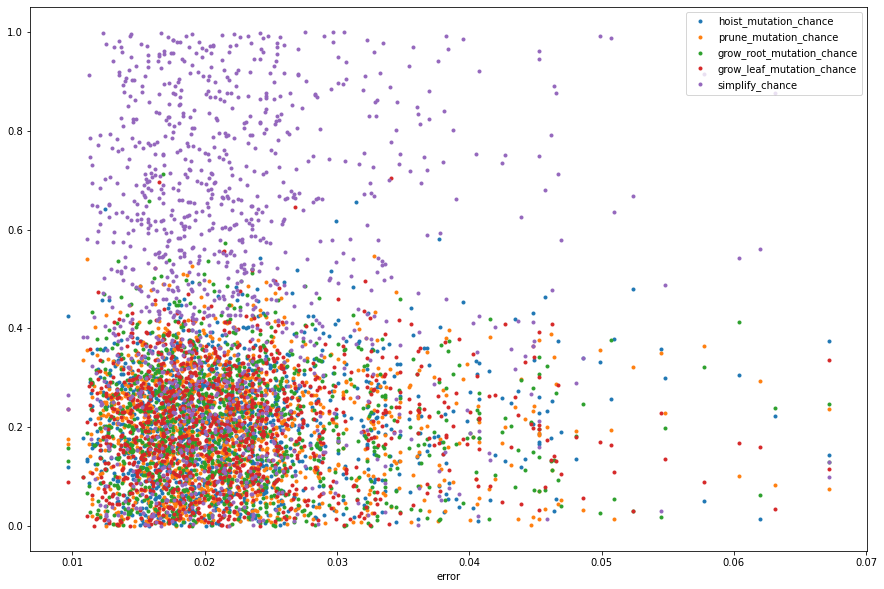

In [5]:
resdf.plot(y = ['hoist_mutation_chance', 'prune_mutation_chance', 'grow_root_mutation_chance', 'grow_leaf_mutation_chance', 'simplify_chance'], x='error', style='.', figsize=(15, 10))

In [6]:
resdf.corr('spearman')['error']

prune_mutation_chance       -0.030234
hoist_mutation_chance        0.046282
grow_leaf_mutation_chance    0.038555
grow_root_mutation_chance   -0.038363
simplify_chance              0.024601
n                            0.017298
mutation_children           -0.019565
crossover_children          -0.031668
error                        1.000000
point_chance                -0.037812
chunk                        0.999410
Name: error, dtype: float64

<AxesSubplot:xlabel='chunk'>

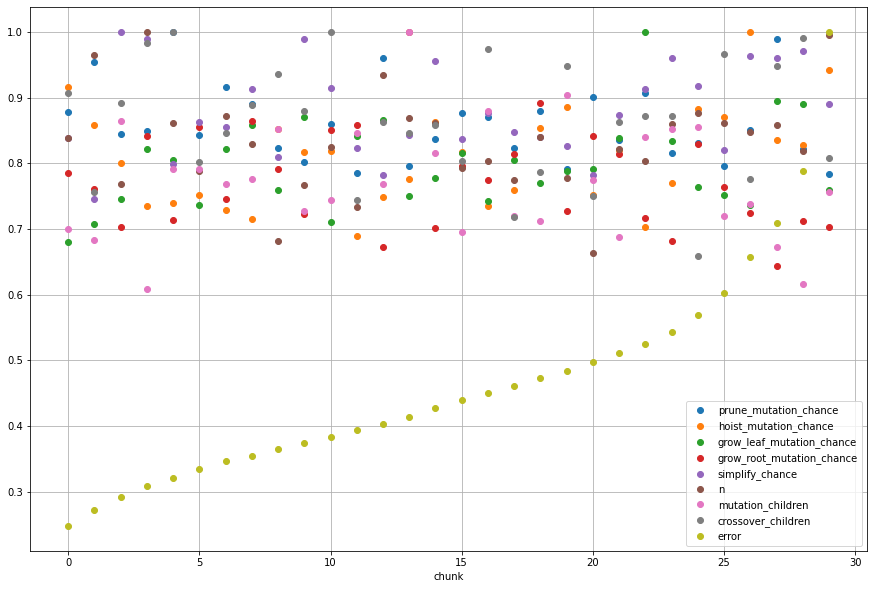

In [7]:
noerror = final_res.iloc[:, :-2]
noerror /= noerror.max()
noerror.plot(figsize=(15, 10), grid=True, style='o')

We train another Regressor, to explain the error of the previous one. But there's still work to do for interpretability of the results.

In [8]:
r2 = Regressor(duration=10, verbose=True, simplify_chance=.01)
X2 = resdf.loc[:,  [c for c in resdf.columns if c not in ['error', 'chunk']]]
y2 = resdf.loc[:, 'error']
X2['rand'] = np.random.random(np.shape(X2.iloc[:, 0]))  # Add decoys as witnesses of overfitting
X2['rand2'] = np.random.random(np.shape(X2.iloc[:, 0]))
X2 /= X2.mean()
y2 /= y2.mean()
X2

,prune_mutation_chance,hoist_mutation_chance,grow_leaf_mutation_chance,grow_root_mutation_chance,simplify_chance,n,mutation_children,crossover_children,point_chance,rand,rand2
0,0.859892,2.113816,0.445883,0.663835,0.473412,0.789162,1.858160,1.789442,0.910097,0.229742,0.556658
1,0.911414,0.596902,1.184533,0.785454,0.530947,0.789162,1.858160,1.789442,1.506199,0.160323,0.295673
2,1.740448,0.889968,0.498205,0.499185,0.761770,1.262659,1.114896,0.357888,1.390822,0.888174,0.311595
3,1.848834,0.677772,1.047862,0.334512,0.762151,2.051822,1.858160,1.789442,1.120355,0.309003,0.396319
4,2.805427,0.660223,0.105554,0.939131,1.160009,1.262659,0.371632,0.715777,0.571726,1.645676,1.355891
...,...,...,...,...,...,...,...,...,...,...,...
1195,0.522615,1.516537,0.835052,2.066728,1.081546,1.262659,1.858160,1.789442,0.064752,0.473181,0.432551
1196,1.519937,0.068320,0.798987,0.313911,1.117630,2.051822,0.371632,1.789442,2.288257,0.715252,1.527637
1197,0.427421,1.108257,0.176781,1.194024,1.748077,2.051822,0.743264,0.715777,2.046137,0.891672,1.203810
1198,1.227208,0.713669,0.575916,1.230136,0.200363,2.051822,1.114896,1.073665,1.257082,0.988098,1.724794


<AxesSubplot:>

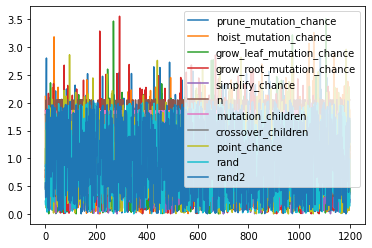

In [9]:
X2.plot()

In [10]:
r2.fit(X2, y2)

Time left  : 8.97s
Best so far: (0.35621596337939126, 13) (error, complexity)
Time left  : 7.95s
Best so far: (0.35547486209910173, 20) (error, complexity)
Time left  : 6.92s
Best so far: (0.3547926822294409, 35) (error, complexity)
Time left  : 5.91s
Best so far: (0.3533212730612121, 58) (error, complexity)
Time left  : 4.90s
Best so far: (0.35323151496604127, 32) (error, complexity)
Time left  : 3.87s
Best so far: (0.3529097875119579, 36) (error, complexity)
Time left  : 2.86s
Best so far: (0.35271734668815286, 36) (error, complexity)
Time left  : 1.82s
Best so far: (0.3526730589822635, 70) (error, complexity)
Time left  : 0.80s
Best so far: (0.3524268619190549, 68) (error, complexity)
Complete. {'generations': 341, 'stagnated_generations': 0, 'duration': 10.066643476486206}


In [11]:
"""
[{'error': 0.3376952051100154, 'complexity': 1, 'program': Program('1.0', 12)},
"""

r2.results()[:10]

[{'error': 0.35724838391734814,
  'complexity': 1,
  'program': Program('1.0', 11)},
 {'error': 0.3570011480559763,
  'complexity': 3,
  'program': Program('pow 1.011586283217278 $hoist_mutation_chance', 11)},
 {'error': 0.35646741201321347,
  'complexity': 5,
  'program': Program('pow pow 1.011586283217278 $hoist_mutation_chance $hoist_mutation_chance', 11)},
 {'error': 0.3559972614441798,
  'complexity': 7,
  'program': Program('pow pow pow 1.011586283217278 $hoist_mutation_chance $hoist_mutation_chance $n', 11)},
 {'error': 0.35541403113689124,
  'complexity': 9,
  'program': Program('pow pow pow 1.011586283217278 sub $hoist_mutation_chance $grow_root_mutation_chance $hoist_mutation_chance $hoist_mutation_chance', 11)},
 {'error': 0.3547086574202184,
  'complexity': 11,
  'program': Program('pow pow pow pow 1.011586283217278 sub $hoist_mutation_chance $grow_root_mutation_chance $hoist_mutation_chance $n 2.3426914223023876', 11)},
 {'error': 0.35404287516282806,
  'complexity': 13,
 

<AxesSubplot:xlabel='$0'>

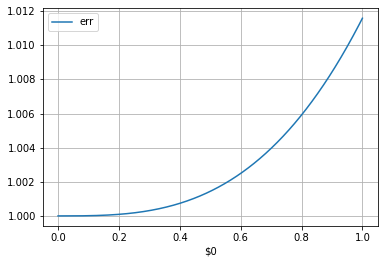

In [16]:
X3 = pd.DataFrame({'$0': np.linspace(0, 1, 1001)})
from symreg.ga import Program
p = Program(
   re.sub('\$[a-z_]+', '$0',
          'pow pow pow 1.011586283217278 sub .5 $grow_root_mutation_chance  $hoist_mutation_chance'
         )
)
X3['err'] = p.eval([X3['$0']])
X3.plot(x='$0', y='err', grid=True)

In [13]:
resdf.loc[:,  [c for c in resdf.columns if c not in ['error', 'chunk']]]

,prune_mutation_chance,hoist_mutation_chance,grow_leaf_mutation_chance,grow_root_mutation_chance,simplify_chance,n,mutation_children,crossover_children,point_chance
0,0.165732,0.424971,0.089471,0.132822,0.237305,50,5,5,0.187005
1,0.175662,0.120004,0.237688,0.157156,0.266145,50,5,5,0.309491
2,0.335446,0.178923,0.099970,0.099878,0.381849,80,3,1,0.285783
3,0.356336,0.136262,0.210264,0.066930,0.382040,130,5,5,0.230208
4,0.540705,0.132734,0.021180,0.187904,0.581472,80,1,2,0.117477
...,...,...,...,...,...,...,...,...,...
1195,0.100726,0.304891,0.167562,0.413516,0.542142,80,5,5,0.013305
1196,0.292945,0.013735,0.160325,0.062808,0.560230,130,1,5,0.470186
1197,0.082379,0.222809,0.035473,0.238903,0.876251,130,2,2,0.420436
1198,0.236526,0.143479,0.115563,0.246129,0.100435,130,3,3,0.258303


In [14]:
Program('pow rec 0.9742252905025462 $n').simplify()

Program('pow 1.026456621223781 $n', 0)